In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, Normalizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
for key in df.columns.to_list():
 print(key,":", ((df[key].isna().sum())/(df.shape[0]))*100)

PassengerId : 0.0
Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 19.865319865319865
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 77.10437710437711
Embarked : 0.22446689113355783


In [ ]:
df['Age'].fillna(df[df['Sex']=='female']['Age'].median(),inplace = True)

In [ ]:
df['Age'].fillna(df[df['Sex']=='male']['Age'].median(), inplace = True)

In [ ]:
df.drop(['Cabin','PassengerId','Name'], axis = 1, inplace = True)

In [ ]:
for key in df.columns.to_list():
 print(key,":", ((df[key].isna().sum())/(df.shape[0]))*100)

Survived : 0.0
Pclass : 0.0
Sex : 0.0
Age : 0.0
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Embarked : 0.22446689113355783


In [ ]:
df[df.select_dtypes( exclude ='object').columns.to_list()].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.162929,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.046587,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df[df.select_dtypes( exclude ='object').columns.to_list()].skew()

,0
Survived,0.478523
Pclass,-0.630548
Age,0.551926
SibSp,3.695352
Parch,2.749117
Fare,4.787317


In [ ]:
df[df.select_dtypes( exclude ='object').columns.to_list()].var()

,0
Survived,0.236772
Pclass,0.699015
Age,170.213441
SibSp,1.216043
Parch,0.649728
Fare,2469.436846


<Axes: >

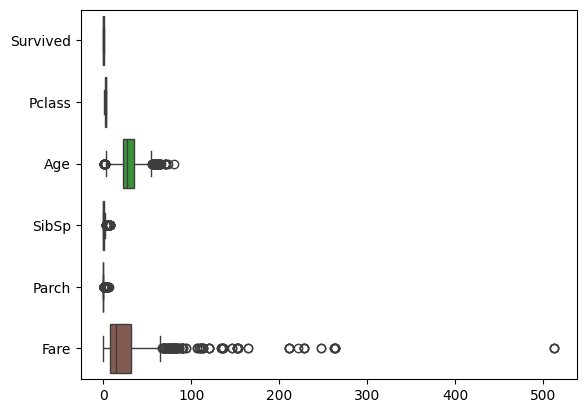

In [ ]:
sns.boxplot(df,orient='h')

In [ ]:
df['Age'].skew()

0.5519261666448233

<Axes: xlabel='Age'>

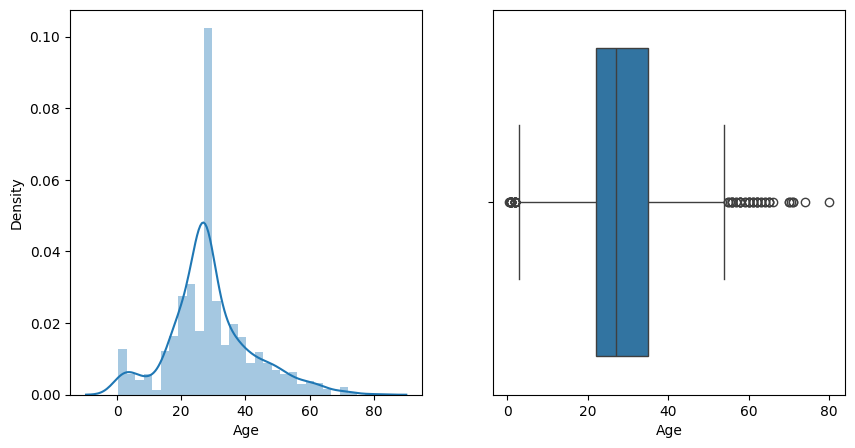

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Age'], orient='h')

In [ ]:
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_limit = df['Age'].quantile(0.75) + 1.5*IQR
lower_limit = df['Age'].quantile(0.25) - 1.5*IQR
print(upper_limit)
print(lower_limit)

54.5
2.5


In [ ]:
df.loc[df['Age']>upper_limit, 'Age'] = upper_limit
df.loc[df['Age']<lower_limit, 'Age'] = lower_limit

<Axes: xlabel='Age'>

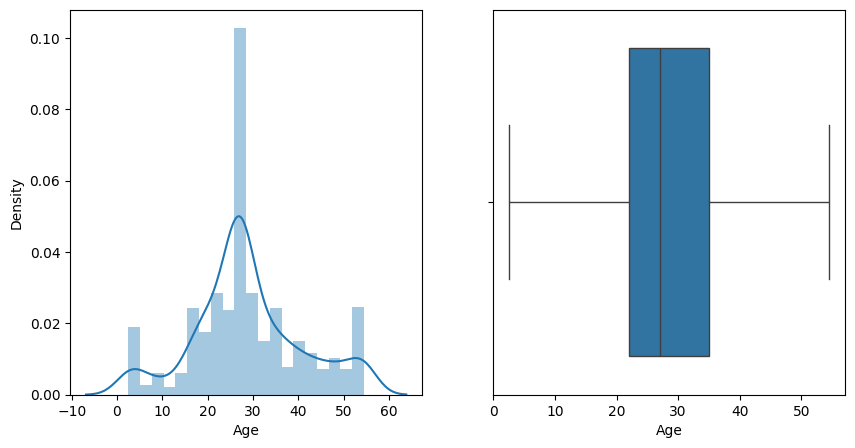

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Age'], orient='h')

In [ ]:
df['Fare'].skew()

4.787316519674893

<Axes: xlabel='Fare'>

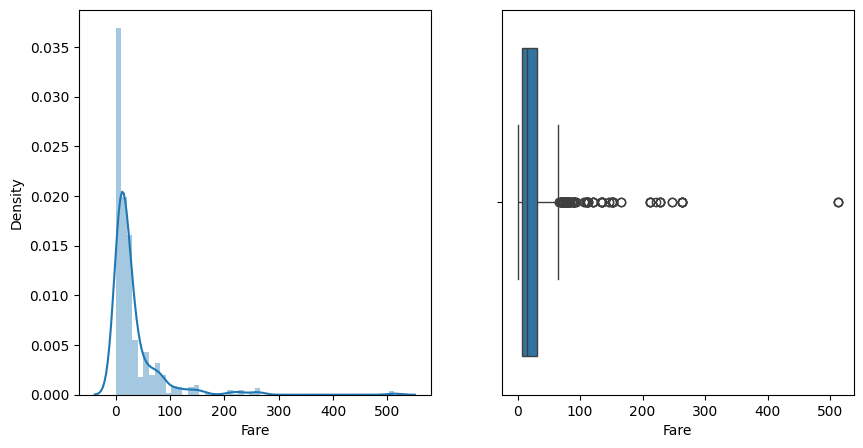

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])
plt.subplot(1,2,2)
sns.boxplot(df['Fare'], orient='h')

In [ ]:
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
upper_limitI = df['Fare'].quantile(0.75) + 1.5*IQR
lower_limitI = df['Fare'].quantile(0.25) - 1.5*IQR
print(upper_limitI)
print(lower_limitI)

65.6344
-26.724


In [ ]:
df.loc[df['Fare']>upper_limitI, 'Fare'] = upper_limitI
df.loc[df['Fare']<lower_limitI, 'Fare'] = lower_limitI

<Axes: xlabel='Fare'>

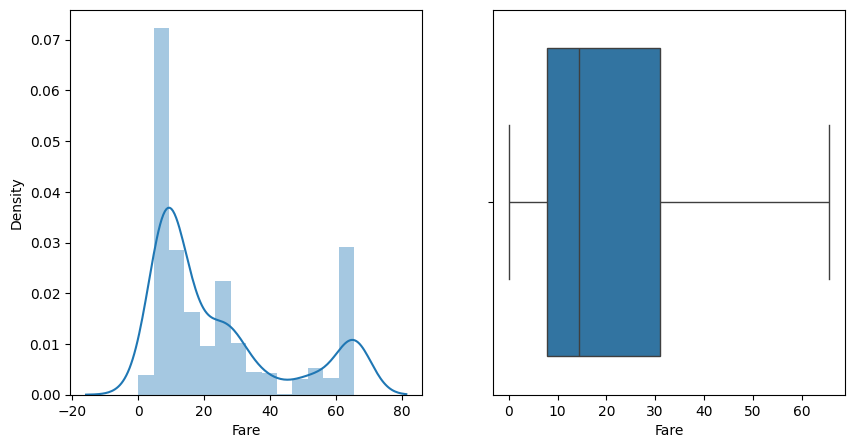

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])
plt.subplot(1,2,2)
sns.boxplot(df['Fare'], orient= 'h')

<Axes: xlabel='SibSp'>

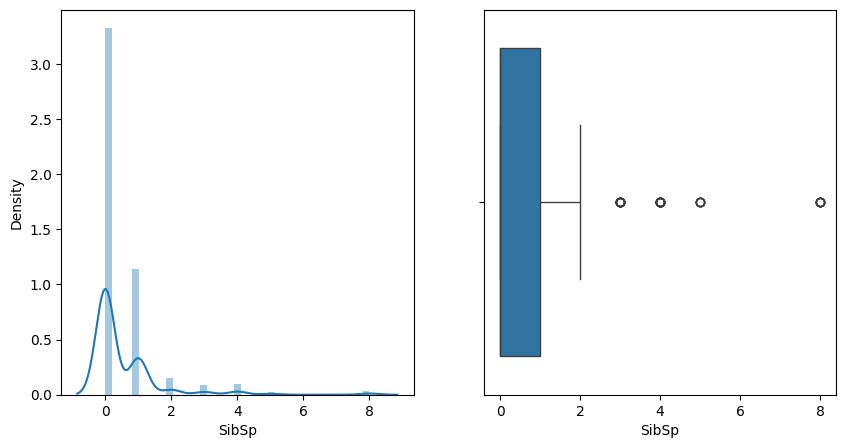

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['SibSp'])
plt.subplot(1,2,2)
sns.boxplot(df['SibSp'], orient= 'h')

In [ ]:
df['SibSp'].skew()

3.6953517271630565

In [ ]:
IQR = df['SibSp'].quantile(0.75) - df['SibSp'].quantile(0.25)
upper_limitI = df['SibSp'].quantile(0.75) + 1.5*IQR
lower_limitI = df['SibSp'].quantile(0.25) - 1.5*IQR
print(upper_limitI)
print(lower_limitI)

2.5
-1.5


In [ ]:
df.loc[df['SibSp']>upper_limitI, 'SibSp'] = upper_limitI
df.loc[df['SibSp']<lower_limitI, 'SibSp'] = lower_limitI

<Axes: ylabel='SibSp'>

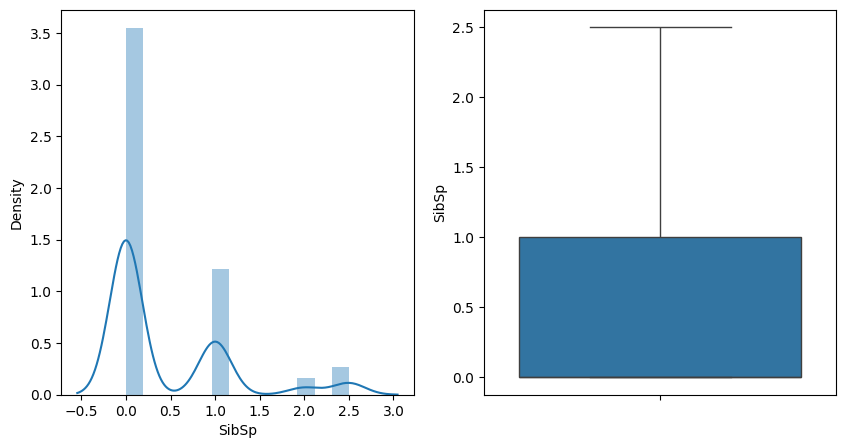

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['SibSp'])
plt.subplot(1,2,2)
sns.boxplot(df['SibSp'])

<Axes: >

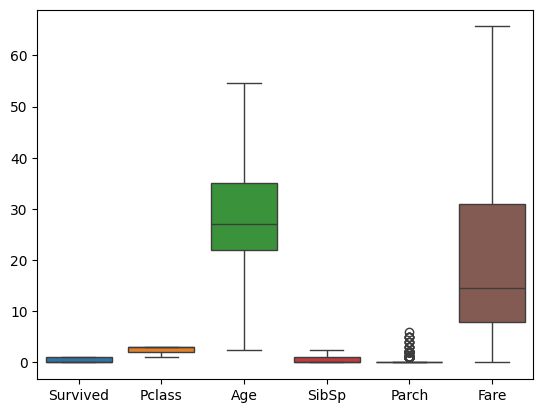

In [ ]:
sns.boxplot(df)

In [ ]:
obj_clm = df.select_dtypes(include='object').columns.to_list()
obj_clm

['Sex', 'Ticket', 'Embarked']

In [ ]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [ ]:
ecd = LabelEncoder()
df['Embarked'] = ecd.fit_transform(df['Embarked'])
df['Embarked'].unique()

array([2, 0, 1, 3])

In [ ]:
len(df[df['Survived']==0])/len(df)*100

61.61616161616161

In [ ]:
df.drop('Ticket', axis = 1, inplace = True)

In [ ]:
train = df.drop('Survived', axis = 1)
target = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [ ]:
# Grid Search
grid = {
    'max_depth': [5,10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]

}
knn = DecisionTreeClassifier()
cv = GridSearchCV(knn, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Training_score: 0.8104761904761905
Test_score: 0.7254237288135593


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [ ]:
# Grid Search
grid = {
    'n_neighbors':np.arange(1,21),
    'metric':['euclidean', 'manhattan', 'minkowski' ],
    'p':np.arange(1,3),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Training_score: 0.16649890877756995
Test_score: 0.2780217519106408


In [ ]:
# Scalling the data
scl = StandardScaler()
train_s = scl.fit_transform(train)
pd.DataFrame(train_s).describe()
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s, target, test_size=0.33, random_state=42)

In [ ]:
# Grid Search
grid = {
    'max_depth': [5,10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]

}
knn = DecisionTreeClassifier()
cv = GridSearchCV(knn, grid, cv=5)
cv.fit(X_train_s, y_train_s)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test_s,y_test_s))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Training_score: 0.8104761904761905
Test_score: 0.7796610169491526


In [ ]:
# Scalling the data
scl = StandardScaler()
train_s = scl.fit_transform(train)
pd.DataFrame(train_s).describe()
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(train_s, target, test_size=0.33, random_state=42)

In [ ]:
# Grid Search
grid_k = {
    'n_neighbors':np.arange(1,21),
    'metric':['euclidean', 'manhattan', 'minkowski' ],
    'p':np.arange(1,3),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn, grid_k, cv=5)
cv.fit(X_train_s, y_train_s)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test_s,y_test_s))

Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
Training_score: 0.3863432106028948
Test_score: 0.45929134967596497
